In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
'''
accidentes_victimas_comun_auton --> df1
victimas_segun_medio_trans --> df2
victimas_dias_mes --> df3
con_victimas_hora_inter --> df4
infracc_inter --> df5
'''

In [120]:
df1 = pd.read_excel('../data/processed/accidentes_victimas_comun_auton.xlsx')
df1.head()


,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS
0,Andalucía,17367,283,310,1491,22414
1,Aragón,2185,70,75,347,2514
2,"Asturias, Principado de",1842,45,49,198,2256
3,"Balears, Illes",2871,60,64,324,3428
4,Canarias,4270,67,69,384,5466


In [121]:
# 1) Ruta al archivo (ajústala si no coincide con tu WD)
ruta = '../data/processed/victimas_segun_medio_trans.xlsx'

# 2) Lee con dos filas de encabezado y usa la 1ª columna como índice
df2 = pd.read_excel(
    ruta,
    header=[0, 1],    # las dos primeras filas como MultiIndex en columnas
    index_col=0,      # la primera columna (“CLASES DE USUARIOS”) como índice
    engine='openpyxl'
)

# 3) Opcional: ponle nombre a los niveles para mayor claridad
df2.index.name = 'CLASES DE USUARIOS'
df2.columns.names = ['Categoría', 'Métrica']

# 4) Muestra el DataFrame
df2



Categoría                                                  Total           \
Métrica                                            Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                          
Peatón                                                       893      835   
Bicicleta                                                   2667     2525   
VMP                                                          180      173   
Ciclomotor                                                   812      768   
Motocicleta                                                 8766     8313   
Turismo de SP hasta 9 plazas                                 312      129   
Turismo sin remolque                                       65005    36047   
Turismo con remolque                                         148       58   
Furgoneta                                                   5369     2471   
Camión <=3.500 kg sin remolque                               969      414   
Camión <=3.500 kg con remolque                                 7        3   
Camión >3.500 kg sin remolque                                930      306   
Camión >3.500 kg con remolque                                 34       13   
Tractocamión (cabeza tractora)                               865      183   
Vehículo articulado                                         1318      430   
Maquinaria obras y agrícola y tractores\nagrícolas           260       92   
Autobús (no escolar)                                        1027      306   
Autobús escolar                                               99       15   
Cuadriciclo                                                  153      127   
Tren/metro/tranvía                                            57        4   
Otro vehículo                                                243      137   
Se desconoce                                                 177       30   
Total                                                      90291    53379   

Categoría                                                                     \
Métrica                                            FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                             
Peatón                                                    130            173   
Bicicleta                                                  61            350   
VMP                                                         2             14   
Ciclomotor                                                 13            107   
Motocicleta                                               317           1385   
Turismo de SP hasta 9 plazas                                2              4   
Turismo sin remolque                                      630           1973   
Turismo con remolque                                        0              1   
Furgoneta                                                  48            130   
Camión <=3.500 kg sin remolque                              8             30   
Camión <=3.500 kg con remolque                              0              0   
Camión >3.500 kg sin remolque                              10             31   
Camión >3.500 kg con remolque                               0              1   
Tractocamión (cabeza tractora)                              4             14   
Vehículo articulado                                        26             39   
Maquinaria obras y agrícola y tractores\nagrícolas         16             18   
Autobús (no escolar)                                        1             22   
Autobús escolar                                             1              2   
Cuadriciclo                                                 8             25   
Tren/metro/tranvía                                          0              0   
Otro vehículo                                              10             24   
Se desconoce                                                1              2 

In [141]:
def cargar_victimas_segun_medio_trans(ruta):
    """
    Carga el archivo Excel de víctimas según medio de transporte con MultiIndex en columnas y la primera columna como índice.
    Asigna nombres a los niveles de índice y columnas.
    Devuelve el DataFrame resultante.
    """
    df2 = pd.read_excel(
        ruta,
        header=[0, 1],    # Dos primeras filas como MultiIndex en columnas
        index_col=0,      # Primera columna como índice
        engine='openpyxl'
    )
    df2.index.name = 'CLASES DE USUARIOS'
    df2.columns.names = ['Categoría', 'Métrica']
    return df2

# Ejemplo de uso:
ruta = '../data/processed/victimas_segun_medio_trans.xlsx'
df2 = cargar_victimas_segun_medio_trans(ruta)
df2.head()

Categoría                  Total                                     \
Métrica            Nº implicados VÍCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peatón                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

Categoría                                 Conductor                      \
Métrica            NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peatón                            532             0        0          0   
Bicicleta                        2114          2661     2522         60   
VMP                               157           177      172          2   
Ciclomotor                        648           684      652         12   
Motocicleta                      6611          7826     7470        301   

Categoría                                                 Pasajero           \
Métrica            HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                            
Peatón                          0                  0             0        0   
Bicicleta                     350               2112             6        3   
VMP                            14                156             3        1   
Ciclomotor                     95                545           128      116   
Motocicleta                  1276               5893           940      843   

Categoría                                                              Peatón  \
Métrica            FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados   
CLASES DE USUARIOS                                                              
Peatón                      0              0                  0           893   
Bicicleta                   1              0                  2             0   
VMP                         0              0                  1             0   
Ciclomotor                  1             12                103             0   
Motocicleta                16            109                718             0   

Categoría                                                                 
Métrica            VÍCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peatón                  835        130            173                532  
Bicicleta                 0          0              0                  0  
VMP                       0          0              0                  0  
Ciclomotor                0          0              0                  0  
Motocicleta               0          0              0                  0

In [122]:
# 1) Ajusta esta ruta si tu WD es otra
ruta = '../data/processed/victimas_dias_mes.xlsx'

# 2) Lee el archivo con MultiIndex en columnas: 2 filas de encabezado, 1ª columna como índice
df3 = pd.read_excel(
    ruta,
    header=[0, 1],      # Dos filas de encabezado para MultiIndex
    index_col=0,        # La primera columna será el índice (Día del mes)
    engine='openpyxl'
)

# 3) Pon nombre claro al índice y a los niveles de columnas
df3.index.name = 'Día del mes'
df3.columns.names = ['Mes', 'Tipo']

# 4) Muestra el DataFrame
df3


Mes          Enero                                     \
Tipo         TOTAL FALLECIDOS HERIDOS\nHOSPITALIZADOS   
Día del mes                                             
Día 1          224          3                      12   
Día 2          348          4                      20   
Día 3          365          1                      23   
Día 4          355          0                      18   
Día 5          394          2                      34   
Día 6          260          6                      15   
Día 7          304          6                      20   
Día 8          292          2                       9   
Día 9          395          7                      19   
Día 10         379          3                      21   
Día 11         329         10                      22   
Día 12         385          5                      28   
Día 13         417          8                      35   
Día 14         408         11                      33   
Día 15         286          6                      18   
Día 16         353          5                      21   
Día 17         336          1                      21   
Día 18         364          2                      19   
Día 19         350          5                      20   
Día 20         420          3                      16   
Día 21         314          5                      22   
Día 22         255          3                      15   
Día 23         341          3                      29   
Día 24         311          2                      13   
Día 25         382          1                      15   
Día 26         314          2                      26   
Día 27         410          5                      24   
Día 28         284          5                      20   
Día 29         269          9                      14   
Día 30         384          3                      31   
Día 31         338          3                      15   
Total        10566        131                     648   

Mes                                    Febrero             \
Tipo        HERIDOS NO\nHOSPITALIZADOS   TOTAL FALLECIDOS   
Día del mes                                                 
Día 1                              209     374          2   
Día 2                              324     365          4   
Día 3                              341     440          5   
Día 4                              337     386         10   
Día 5                              358     339          5   
Día 6                              239     400          5   
Día 7                              278     381          4   
Día 8                              281     310          3   
Día 9                              369     315          4   
Día 10                             355     399          7   
Día 11                             297     344          6   
Día 12                             352     309          2   
Día 13                             374     354          3   
Día 14                             364     327          2   
Día 15                             262     339          3   
Día 16                             327     348          4   
Día 17                             314     350          3   
Día 18                             343     309          5   
Día 19                             325     298          5   
Día 20                             401     279          1   
Día 21                             287     294          2   
Día 22                             237     299          2   
Día 23                             309     361          1   
Día 24                             296     384          6   
Día 25                             366     286          8   
Día 26                             286     248          8   
Día 27                             381     349          6   
Día 28                             259     292          2   
Día 29                             246       0          0   
Día 30                             350       0      

In [142]:
def cargar_victimas_dias_mes(ruta):
    """
    Carga el archivo Excel de víctimas por día del mes con MultiIndex en columnas y la primera columna como índice.
    Asigna nombres a los niveles de índice y columnas.
    Devuelve el DataFrame resultante.
    """
    df3 = pd.read_excel(
        ruta,
        header=[0, 1],      # Dos filas de encabezado para MultiIndex
        index_col=0,        # La primera columna será el índice (Día del mes)
        engine='openpyxl'
    )
    df3.index.name = 'Día del mes'
    df3.columns.names = ['Mes', 'Tipo']
    return df3

# Ejemplo de uso:
ruta = '../data/processed/victimas_dias_mes.xlsx'
df3 = cargar_victimas_dias_mes(ruta)
df3.head()

Mes         Enero                                     \
Tipo        TOTAL FALLECIDOS HERIDOS\nHOSPITALIZADOS   
Día del mes                                            
Día 1         224          3                      12   
Día 2         348          4                      20   
Día 3         365          1                      23   
Día 4         355          0                      18   
Día 5         394          2                      34   

Mes                                    Febrero             \
Tipo        HERIDOS NO\nHOSPITALIZADOS   TOTAL FALLECIDOS   
Día del mes                                                 
Día 1                              209     374          2   
Día 2                              324     365          4   
Día 3                              341     440          5   
Día 4                              337     386         10   
Día 5                              358     339          5   

Mes                                                            Marzo  \
Tipo        HERIDOS\nHOSPITALIZADOS HERIDOS NO\nHOSPITALIZADOS TOTAL   
Día del mes                                                            
Día 1                            15                        357   361   
Día 2                            22                        339   341   
Día 3                            31                        404   426   
Día 4                            29                        347   338   
Día 5                            41                        293   327   

Mes                     ...               Noviembre  \
Tipo        FALLECIDOS  ... HERIDOS\nHOSPITALIZADOS   
Día del mes             ...                           
Día 1                6  ...                      18   
Día 2                3  ...                      23   
Día 3                4  ...                      15   
Día 4                5  ...                      19   
Día 5               10  ...                      19   

Mes                                    Diciembre             \
Tipo        HERIDOS NO\nHOSPITALIZADOS     TOTAL FALLECIDOS   
Día del mes                                                   
Día 1                              249       509          8   
Día 2                              313       359          4   
Día 3                              341       328          4   
Día 4                              332       401          2   
Día 5                              243       405          4   

Mes                                                            TOTAL  \
Tipo        HERIDOS\nHOSPITALIZADOS HERIDOS NO\nHOSPITALIZADOS TOTAL   
Día del mes                                                            
Día 1                            27                        474  4450   
Día 2                            33                        322  4446   
Día 3                            27                        297  4513   
Día 4                            26                        373  4533   
Día 5                            22                        379  4495   

Mes                                                                        
Tipo        FALLECIDOS HERIDOS\nHOSPITALIZADOS HERIDOS NO\nHOSPITALIZADOS  
Día del mes                                                                
Día 1               85                     283                       4082  
Día 2               57                     298                       4091  
Día 3               55                     291                       4167  
Día 4               69                     351                       4113  
Día 5               60                     330                       4105  

[5 rows x 52 columns]

In [123]:
# Lee el archivo con la fila 1 como cabecera y la columna 0 como índice
ruta = '../data/processed/con_victimas_hora_inter.xlsx'
df4 = pd.read_excel(
    ruta,
    header=1,      # la segunda fila contiene los nombres de las columnas
    index_col=0,   # la primera columna (“HORA”) como índice
    engine='openpyxl'
)

# Renombra el índice y las columnas
df4.index.name = 'HORA'
df4.columns.name = None
df4.columns = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo', 'TOTAL']

df4.head()

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,TOTAL
HORA,,,,,,,,
00:00-00:59,86,59,56,59,68,105,111,544
01:00-01:59,50,37,47,40,53,85,102,414
02:00-02:59,36,30,24,31,30,73,92,316
03:00-03:59,36,29,27,21,32,77,79,301
04:00-04:59,29,31,34,30,40,79,85,328


In [125]:

# 1) Ajusta la ruta si tu directorio de trabajo es distinto
ruta = '../data/processed/infracc_inter.xlsx'

# 2) Lee el Excel tomando la fila 2 (cero-indexada) como cabecera y la 1ª columna como índice
df5 = pd.read_excel(
    ruta,
    header=2,      # la tercera fila contiene los nombres de las columnas
    index_col=0,   # la primera columna (“TIPO DE INFRACCIÓN”) como índice
    engine='openpyxl'
)

# 3) Pon nombres claros a índice y a las columnas (opcional)
df5.index.name   = 'Tipo de infracción'
df5.columns.name = 'Vehículo'

# 4) Finalmente, muestra el DataFrame
df5.head()


Vehículo,Total,Bicicleta,VMP,Ciclomotor,Motocicleta,Turismo,Furgoneta,Camión =< 3.500 kg,Camión > 3.500 kg,Autobús,Otro vehículo,Se desconoce
Tipo de infracción,,,,,,,,,,,,
Infracción de velocidad,4541,113,8,36,996,2981,187,44,137,5,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,0,2,3,27,2,2,5,0,1,0
Ninguna infracción de velocidad,28098,1478,105,350,2565,19682,1628,331,1498,154,278,29
Se desconoce,28367,1070,64,296,4261,18768,1889,376,1285,88,215,55
Total infracciones de velocidad,61048,2661,177,684,7825,41458,3706,753,2925,247,520,92


In [143]:
def cargar_infracciones_inter(ruta):
    """
    Carga el archivo Excel de infracciones en intersecciones.
    Usa la tercera fila como cabecera y la primera columna como índice.
    Renombra el índice y las columnas para mayor claridad.
    Devuelve el DataFrame resultante.
    """
    df5 = pd.read_excel(
        ruta,
        header=2,      # la tercera fila contiene los nombres de las columnas
        index_col=0,   # la primera columna (“TIPO DE INFRACCIÓN”) como índice
        engine='openpyxl'
    )
    df5.index.name = 'Tipo de infracción'
    df5.columns.name = 'Vehículo'
    return df5

# Ejemplo de uso:
ruta = '../data/processed/infracc_inter.xlsx'
df5 = cargar_infracciones_inter(ruta)
df5.head()

Vehículo,Total,Bicicleta,VMP,Ciclomotor,Motocicleta,Turismo,Furgoneta,Camión =< 3.500 kg,Camión > 3.500 kg,Autobús,Otro vehículo,Se desconoce
Tipo de infracción,,,,,,,,,,,,
Infracción de velocidad,4541,113,8,36,996,2981,187,44,137,5,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,0,2,3,27,2,2,5,0,1,0
Ninguna infracción de velocidad,28098,1478,105,350,2565,19682,1628,331,1498,154,278,29
Se desconoce,28367,1070,64,296,4261,18768,1889,376,1285,88,215,55
Total infracciones de velocidad,61048,2661,177,684,7825,41458,3706,753,2925,247,520,92


Accidentes con víctimas: 473286
Accidentes mortales: 3360
Heridos hospitalizados: 18530
Heridos no hospitalizados: 248532


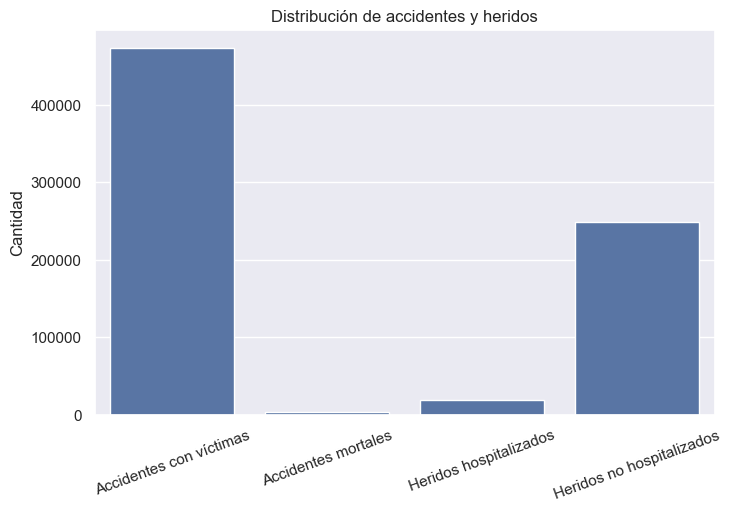

In [77]:
# RESPONDER A LA VISION GLOBAL
#Objetivo: ¿Cómo se distribuyen los accidentes (entre "accidentes con víctimas" y "accidentes mortales") y los heridos (segun "heridos hospitalizados" y "heridos no hospitalizados")?
# Seleccionamos las columnas relevantes del total mensual (fila 'Total')
cols_accidentes = [col for col in df3.columns if "TOTAL" in col]
cols_mortales = [col for col in df3.columns if "MORTALES A 30 DÍAS" in col]
cols_heridos_hosp = [col for col in df3.columns if "HERIDOS HOSPITALIZADOS" in col]
cols_heridos_nohosp = [col for col in df3.columns if "HERIDOS NO HOSPITALIZADOS" in col]

# Extraemos los totales de la fila 'Total'
totales = df3.loc["Total"]

# Sumamos los valores de cada grupo
accidentes_victimas = totales[cols_accidentes].sum()
accidentes_mortales = totales[cols_mortales].sum()
heridos_hospitalizados = totales[cols_heridos_hosp].sum()
heridos_no_hospitalizados = totales[cols_heridos_nohosp].sum()

# Mostramos la distribución
print("Accidentes con víctimas:", accidentes_victimas)
print("Accidentes mortales:", accidentes_mortales)
print("Heridos hospitalizados:", heridos_hospitalizados)
print("Heridos no hospitalizados:", heridos_no_hospitalizados)

# Visualización
labels = ['Accidentes con víctimas', 'Accidentes mortales', 'Heridos hospitalizados', 'Heridos no hospitalizados']
values = [accidentes_victimas, accidentes_mortales, heridos_hospitalizados, heridos_no_hospitalizados]

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=values)
plt.title("Distribución de accidentes y heridos")
plt.ylabel("Cantidad")
plt.xticks(rotation=20)
plt.show()


**Conclusiones de la Visión Global**

- El total de accidentes con víctimas en 2023 asciende a **473 286**, lo que evidencia la magnitud del problema.  
- Los accidentes mortales son **3 360**, apenas un **0,7 %** del total, por lo que la letalidad es muy baja.  
- Los heridos hospitalizados suman **18 530**, alrededor de un **3,9 %**, por lo que solo una minoría requiere atención en hospital.  
- La mayoría de los accidentes con víctimas resultan en heridos no hospitalizados (**248 532**, un **52,5 %**), lo que significa que la mayoria son lesiones leves.  
- Estos datos sugieren que, aunque los fallecimientos son raros, existe un elevado número de siniestros que causan lesiones leves o moderadas: reforzar medidas de prevención y uso de sistemas de contención puede ayudar a reducir tanto la frecuencia como la gravedad de las lesiones.


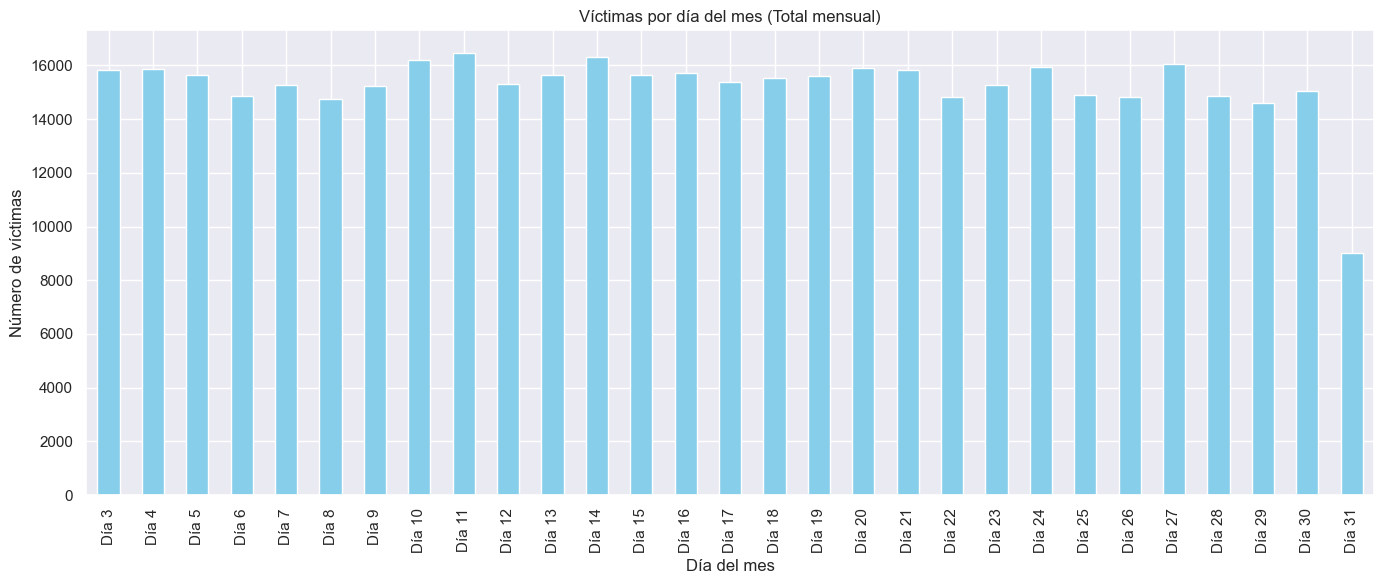

In [ ]:
# Gráfico de los totales mensuales de víctimas por día del mes
plt.figure(figsize=(14,6))
victimas_mensual['Total víctimas día'].plot(kind='bar', color='skyblue')
plt.title('Víctimas por día del mes (Total mensual)')
plt.xlabel('Día del mes')
plt.ylabel('Número de víctimas')
plt.tight_layout()
plt.show()

# El gráfico muestra la suma total de víctimas por cada día del mes, considerando todos los meses juntos.
# No corresponde a un mes concreto, sino al total agregado de todos los meses disponibles en el DataFrame.

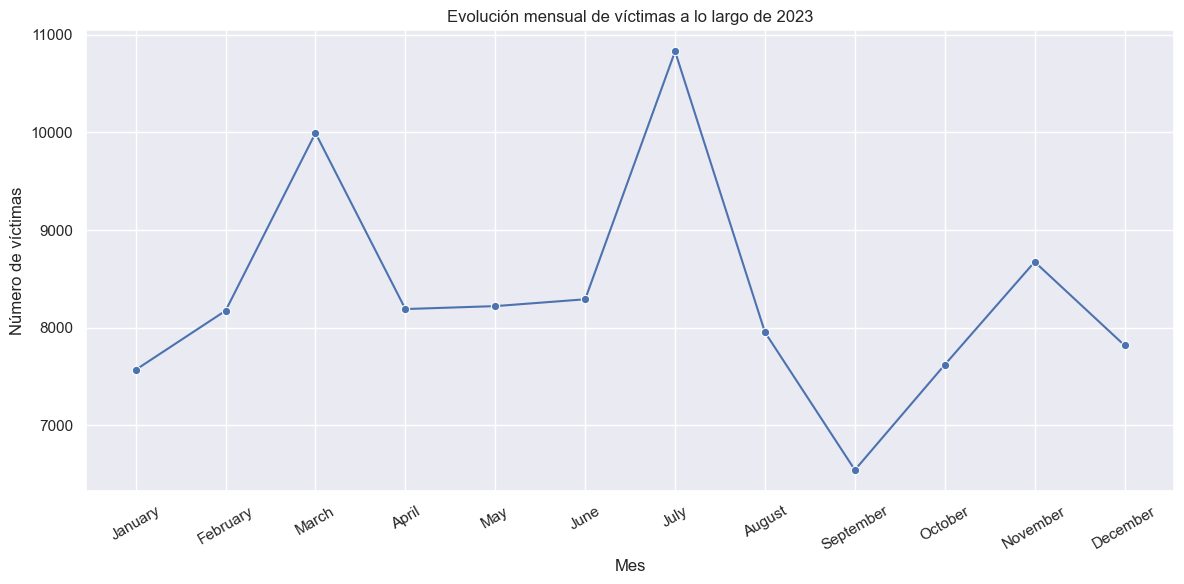

In [89]:
# Gráfico de la evolución mensual de víctimas a lo largo de 2023
# Usamos la serie 'victimas_por_mes' y las etiquetas de los meses

plt.figure(figsize=(12,6))
# Asegúrate de que x e y tengan la misma longitud (12)
sns.lineplot(x=meses_nombres, y=victimas_por_mes.values[:12], marker='o')
plt.title('Evolución mensual de víctimas a lo largo de 2023')
plt.xlabel('Mes')
plt.ylabel('Número de víctimas')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Picos y valles claros

El pico más alto se registra en julio, con alrededor de 10 800 víctimas, seguido de marzo con unas 10 000 víctimas.

El mínimo aparece en septiembre, con aproximadamente 6 500 víctimas, siendo el mes con menor siniestralidad.

Patrón estacional

Se observa un aumento sostenido desde enero (unos 7 600) hasta marzo, un descenso ligero en abril–junio, y luego el gran repunte veraniego en julio.

Tras el pico de verano, el número desciende de nuevo en agosto y cae bruscamente en septiembre, para recuperarse de forma moderada en el último trimestre.

Variabilidad en el semestre otoño-invierno

Octubre (≈7 600) y diciembre (≈7 800) muestran valores similares a inicios de año, mientras que en noviembre hay un pequeño repunte (≈8 700).

Posibles explicaciones

Vacaciones de Semana Santa y temporada de primavera podrían explicar la subida de marzo.

El aumento de tráfico veraniego (viajes por vacaciones, condiciones de calor) explica el máximo de julio.

La caída en septiembre puede deberse a la vuelta progresiva a la rutina laboral y escolar, con tráfico más controlado.

En conjunto, el patrón sugiere dos “temporadas altas” de siniestralidad (primavera y, sobre todo, verano) y un valle claro tras el verano, lo que podría orientar medidas de prevención focalizadas en esos meses críticos.

In [ ]:
#######5. LIMPIEZA Y TRANSFORMACION (ETL)

In [150]:
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,total_de_victimas
0,Andalucía,17367,283,310,1491,22414,83730
1,Aragón,2185,70,75,347,2514,10382
2,"Asturias, Principado de",1842,45,49,198,2256,8780
3,"Balears, Illes",2871,60,64,324,3428,13494
4,Canarias,4270,67,69,384,5466,20512


In [152]:
def agregar_total_victimas(df1):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de víctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nVÍCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df1.columns]
    df1['total_de_victimas'] = df1[columnas_existentes].sum(axis=1)
    return df1

# Ejemplo de uso:
df1_total = agregar_total_victimas(df1)
df1_total.head()

,COMUNIDAD AUTÓNOMA,ACCIDENTES CON\nVÍCTIMAS,ACCIDENTES\nMORTALES,FALLECIDOS,HERIDOS\nHOSPITALIZADOS,HERIDOS NO\nHOSPITALIZADOS,total_de_victimas
0,Andalucía,17367,283,310,1491,22414,41865
1,Aragón,2185,70,75,347,2514,5191
2,"Asturias, Principado de",1842,45,49,198,2256,4390
3,"Balears, Illes",2871,60,64,324,3428,6747
4,Canarias,4270,67,69,384,5466,10256


In [130]:
# Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peatón respecto a Total,
# pero NO aplica el cálculo a las subcolumnas bajo la columna principal "Total"
columnas = ['Total', 'Conductor', 'Pasajero', 'Peatón']
subcolumnas = ['Nº implicados', 'VÍCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

porcentajes = {}
for col in columnas:
    for subcol in subcolumnas:
        key = (col, subcol)
        if col == 'Total':
            porcentajes[key] = df2[(col, subcol)]
        else:
            porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

df_porcentajes = pd.concat(porcentajes, axis=1)
df2_porcentajes = df_porcentajes.round(2)
df2_porcentajes.head()

Total                                     \
                   Nº implicados VÍCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peatón                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peatón                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                            
Peatón                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peatón  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados   
CLASES DE USUARIOS                                                              
Peatón                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   VÍCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peatón                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [138]:
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peatón respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peatón']
    subcolumnas = ['Nº implicados', 'VÍCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()

Total                                     \
                   Nº implicados VÍCTIMAS FALLECIDOS HOSPITALIZADOS   
CLASES DE USUARIOS                                                    
Peatón                       893      835        130            173   
Bicicleta                   2667     2525         61            350   
VMP                          180      173          2             14   
Ciclomotor                   812      768         13            107   
Motocicleta                 8766     8313        317           1385   

                                          Conductor                      \
                   NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS FALLECIDOS   
CLASES DE USUARIOS                                                        
Peatón                            532          0.00     0.00       0.00   
Bicicleta                        2114         99.78    99.88      98.36   
VMP                               157         98.33    99.42     100.00   
Ciclomotor                        648         84.24    84.90      92.31   
Motocicleta                      6611         89.28    89.86      94.95   

                                                          Pasajero           \
                   HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados VÍCTIMAS   
CLASES DE USUARIOS                                                            
Peatón                       0.00               0.00          0.00     0.00   
Bicicleta                  100.00              99.91          0.22     0.12   
VMP                        100.00              99.36          1.67     0.58   
Ciclomotor                  88.79              84.10         15.76    15.10   
Motocicleta                 92.13              89.14         10.72    10.14   

                                                                       Peatón  \
                   FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS Nº implicados   
CLASES DE USUARIOS                                                              
Peatón                   0.00           0.00               0.00         100.0   
Bicicleta                1.64           0.00               0.09           0.0   
VMP                      0.00           0.00               0.64           0.0   
Ciclomotor               7.69          11.21              15.90           0.0   
Motocicleta              5.05           7.87              10.86           0.0   

                                                                          
                   VÍCTIMAS FALLECIDOS HOSPITALIZADOS NO\nHOSPITALIZADOS  
CLASES DE USUARIOS                                                        
Peatón                100.0      100.0          100.0              100.0  
Bicicleta               0.0        0.0            0.0                0.0  
VMP                     0.0        0.0            0.0                0.0  
Ciclomotor              0.0        0.0            0.0                0.0  
Motocicleta             0.0        0.0            0.0                0.0

In [131]:
# Definir las franjas horarias y las horas correspondientes
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

# Agrupar sumando por franja horaria
df4_franjas = pd.DataFrame([
    df4.loc[horas].sum() for horas in franjas.values()
], index=franjas.keys())

df4_franjas

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,TOTAL
00:00-05:59,302,235,268,256,296,517,575,2449
06:00-11:59,1678,1537,1538,1452,1465,1384,1358,10412
12:00-17:59,1895,1826,1875,1883,2288,1967,1780,13514
18:00-23:59,1177,1181,1156,1315,1499,1398,1229,8955


In [154]:
def agrupar_por_franja_horaria(df4, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como índice.
    """
    df_franjas = pd.DataFrame([
        df4.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas

,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Domingo,TOTAL
00:00-05:59,302,235,268,256,296,517,575,2449
06:00-11:59,1678,1537,1538,1452,1465,1384,1358,10412
12:00-17:59,1895,1826,1875,1883,2288,1967,1780,13514
18:00-23:59,1177,1181,1156,1315,1499,1398,1229,8955


In [133]:
# Crear nuevas columnas agrupadas según la categoría solicitada
df5_agrupado_columnas = pd.DataFrame({
    'Total': df5['Total'],
    'Sin motor': df5['Bicicleta'] + df5['VMP'],
    'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
    'a motor grande': df5['Camión =< 3.500 kg'] + df5['Camión > 3.500 kg'] + df5['Autobús'],
    'otro vehiculo': df5['Otro vehículo'],
    'se desconoce': df5['Se desconoce']
})

df5_agrupado_columnas.head()

,Total,Sin motor,a motor,a motor grande,otro vehiculo,se desconoce
Tipo de infracción,,,,,,
Infracción de velocidad,4541,121,4200,186,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,34,7,1,0
Ninguna infracción de velocidad,28098,1583,24225,1983,278,29
Se desconoce,28367,1134,25214,1749,215,55
Total infracciones de velocidad,61048,2838,53673,3925,520,92


In [140]:
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 según las categorías solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Camión =< 3.500 kg'] + df5['Camión > 3.500 kg'] + df5['Autobús'],
        'otro vehiculo': df5['Otro vehículo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()

,Total,Sin motor,a motor,a motor grande,otro vehiculo,se desconoce
Tipo de infracción,,,,,,
Infracción de velocidad,4541,121,4200,186,26,8
Marcha lenta entorpeciendo la\ncirculación,42,0,34,7,1,0
Ninguna infracción de velocidad,28098,1583,24225,1983,278,29
Se desconoce,28367,1134,25214,1749,215,55
Total infracciones de velocidad,61048,2838,53673,3925,520,92


In [ ]:
## ENCAPSULAR LAS FUNCIONES
#TRANSFORMACIONES
df1_total_victimas = df1['total_de_victimas'] = df1.sum(axis=1, numeric_only=True)
df1.head()

df2_porcentajes.head()

df4_franjas

df5_agrupado_columnas.head()

----------------------------------------------------------------------
def agregar_total_victimas(df):
    """
    Agrega una columna 'total_de_victimas' al DataFrame sumando solo las columnas relevantes de víctimas.
    """
    columnas_sumar = [
        'ACCIDENTES CON\nVÍCTIMAS',
        'ACCIDENTES\nMORTALES',
        'FALLECIDOS',
        'HERIDOS\nHOSPITALIZADOS',
        'HERIDOS NO\nHOSPITALIZADOS'
    ]
    # Solo suma las columnas que existen en el DataFrame
    columnas_existentes = [col for col in columnas_sumar if col in df.columns]
    df['total_de_victimas'] = df[columnas_existentes].sum(axis=1)
    return df

# Ejemplo de uso:
df1 = agregar_total_victimas(df1)
df1.head()
------------------------------------------------------------------------------------
def calcular_porcentajes_victimas(df2):
    """
    Calcula el porcentaje de cada subcolumna de Conductor, Pasajero y Peatón respecto a Total,
    para las subcolumnas especificadas. Devuelve un DataFrame con los porcentajes redondeados a 2 decimales.
    """
    columnas = ['Total', 'Conductor', 'Pasajero', 'Peatón']
    subcolumnas = ['Nº implicados', 'VÍCTIMAS', 'FALLECIDOS', 'HOSPITALIZADOS', 'NO\nHOSPITALIZADOS']

    porcentajes = {}
    for col in columnas:
        for subcol in subcolumnas:
            key = (col, subcol)
            if col == 'Total':
                porcentajes[key] = df2[(col, subcol)]
            else:
                porcentajes[key] = df2[(col, subcol)] / df2[('Total', subcol)] * 100

    df_porcentajes = pd.concat(porcentajes, axis=1)
    df2_porcentajes = df_porcentajes.round(2)
    return df2_porcentajes

# Ejemplo de uso:
df2_porcentajes = calcular_porcentajes_victimas(df2)
df2_porcentajes.head()
----------------------------------------------------------------------------------------
def agrupar_por_franja_horaria(df, franjas):
    """
    Agrupa y suma los valores de un DataFrame por las franjas horarias definidas en el diccionario 'franjas'.
    Devuelve un nuevo DataFrame con las franjas como índice.
    """
    df_franjas = pd.DataFrame([
        df.loc[horas].sum() for horas in franjas.values()
    ], index=franjas.keys())
    return df_franjas

# Ejemplo de uso:
franjas = {
    '00:00-05:59': ['00:00-00:59', '01:00-01:59', '02:00-02:59', '03:00-03:59', '04:00-04:59', '05:00-05:59'],
    '06:00-11:59': ['06:00-06:59', '07:00-07:59', '08:00-08:59', '09:00-09:59', '10:00-10:59', '11:00-11:59'],
    '12:00-17:59': ['12:00-12:59', '13:00-13:59', '14:00-14:59', '15:00-15:59', '16:00-16:59', '17:00-17:59'],
    '18:00-23:59': ['18:00-18:59', '19:00-19:59', '20:00-20:59', '21:00-21:59', '22:00-22:59', '23:00-23:59']
}

df4_franjas = agrupar_por_franja_horaria(df4, franjas)
df4_franjas
----------------------------------------------------------------------------------------
def agrupar_columnas_df5(df5):
    """
    Agrupa las columnas de df5 según las categorías solicitadas y devuelve un nuevo DataFrame con las columnas agrupadas.
    """
    df5_agrupado = pd.DataFrame({
        'Total': df5['Total'],
        'Sin motor': df5['Bicicleta'] + df5['VMP'],
        'a motor': df5['Ciclomotor'] + df5['Motocicleta'] + df5['Turismo'] + df5['Furgoneta'],
        'a motor grande': df5['Camión =< 3.500 kg'] + df5['Camión > 3.500 kg'] + df5['Autobús'],
        'otro vehiculo': df5['Otro vehículo'],
        'se desconoce': df5['Se desconoce']
    })
    return df5_agrupado

# Ejemplo de uso:
df5_agrupado_columnas = agrupar_columnas_df5(df5)
df5_agrupado_columnas.head()





# 7. IMPORTAR nuestro propio codigo definido para ejecutarlo: notebook

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import src.exploration as exp
import src.visualization as vis
import src.transformation as ts

exp.cargar_victimas_segun_medio_trans(ruta) 
exp.cargar_victimas_dias_mes(ruta)
exp.cargar_con_victimas_hora_inter(ruta)
exp.cargar_infracciones_inter(ruta)

ts.agregar_total_victimas(df1)
ts.calcular_porcentajes_victimas(df2)
ts.agrupar_por_franja_horaria(df, franjas)
ts.agrupar_columnas_df5(df5)




